## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [111]:
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


### 1.2 import and put the train and test datasets in  pandas dataframe

In [112]:
train=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\train.csv')
test=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\test.csv')



### 1.3 display the first five rows of the train dataset.

In [113]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [114]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of shape of Train,test

In [115]:
print("Train=",train.shape)
print("Test=",test.shape)

Train= (1460, 81)
Test= (1459, 80)


### 1.6 Save the 'Id' column

In [62]:
train_ID=train['Id']
test_ID=test['Id']

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [116]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

### 1.8 check again the data size after dropping the 'Id' variable

In [117]:
print('Train_New_Shape=',train.shape)
print('Test_New_Shape=',test.shape)


Train_New_Shape= (1460, 80)
Test_New_Shape= (1459, 79)


## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

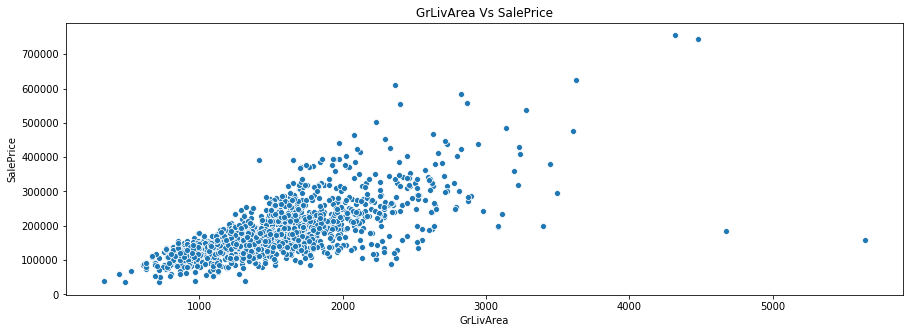

In [118]:
# create subplots 
f,ax=plt.subplots(1,1,figsize=(15,5))
#create scatter plots for train['GrLivArea'],  train['SalePrice']
sns.scatterplot(x=train['GrLivArea'],y=train['SalePrice'],ax=ax)
ax.set_title('GrLivArea Vs SalePrice')
plt.show()

#### observation:


In [ ]:
We can observe few outliers in the dataset.Around 4-5
Positive correlation 
Bottom 2 are high outliers which have high area but less price.

### 1.9 b) Deleting outliers.And your observation?

(1397, 84)


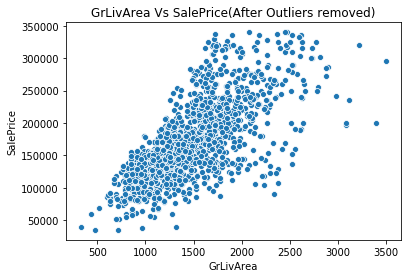

In [191]:
df2=train[(train['SalePrice']<340037)&(train['GrLivArea']<4000)]
print(df2.shape)
#Check the graphic again

#create scatterplot for train['GrLivArea'], train['SalePrice']
sns.scatterplot(x=df2['GrLivArea'],y=df2['SalePrice'])
plt.title('GrLivArea Vs SalePrice(After Outliers removed)')
plt.show()

#### observation:
  

In [ ]:
Bottom 2 outliers removed but still few outliers are there

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

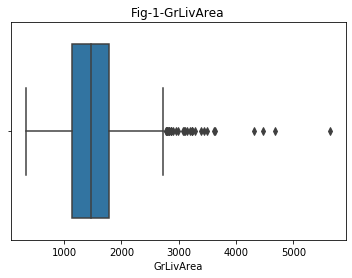

In [192]:
sns.boxplot(train['GrLivArea'])
plt.title('Fig-1-GrLivArea')
plt.show()

In [68]:
df=train.drop(train[train['GrLivArea']>2600].index)

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

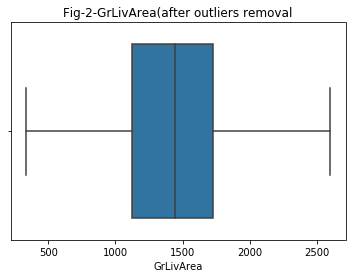

In [195]:
sns.boxplot(df['GrLivArea'])
plt.title('Fig-2-GrLivArea(after outliers removal')
plt.show()

## Observation

In [32]:
All The outliers have now reduced significantly.
Also the new boxplot creates new data distribution .Mean, median values are affected in Fig1
Fig2 all outliers cut off.It is a clean data


## 1.10 Checking the skeweness for saleprice.And your observation?

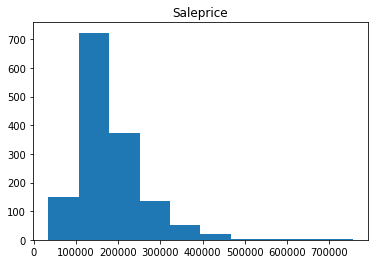

Skewness= 1.8828757597682129


In [198]:
# create histogram for saleprice
plt.hist(x=train['SalePrice'])
plt.title('Saleprice')
plt.show()
print("Skewness=",train['SalePrice'].skew())


# Get the fitted parameters used by the function

#Now plot the distribution

#Get also the QQ-plot


### observation:


In [ ]:
SKewness is quite higher as it is right skewed & hence has a lot of outliers in the right side.


### 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [199]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train['SalePrice']=np.log1p(train['SalePrice'])
print('Skewness after Log transformation=',train['SalePrice'].skew())

Skewness after Log transformation= 0.12134661989685333


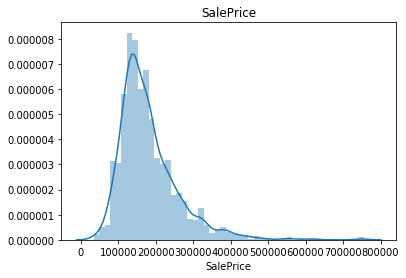

In [197]:
#Check the new distribution 
sns.distplot(train['SalePrice'])
plt.title('SalePrice')
plt.show()

# Get the fitted parameters used by the function


#Now plot the distribution

#Get also the QQ-plot


#### observation:


In [ ]:
Skewness has significantly reduced after log transformation from 1.88 to 0.12.

### 1.11 concatenate the train and test data in the same dataframe

In [119]:
ntrain=train.shape[0]
ntest=test.shape[0]
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.head()

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [120]:
# Drop the SalePrice
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [121]:
print("All_data Shape=",all_data.shape)

All_data Shape= (2919, 79)


### 1.12 Cecking the all Missing Data?

In [122]:
k=all_data.isnull().sum()
k

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
Utilities          2
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
Length: 79, dtype: int64

### 1.13 plot the missing values using barplot?

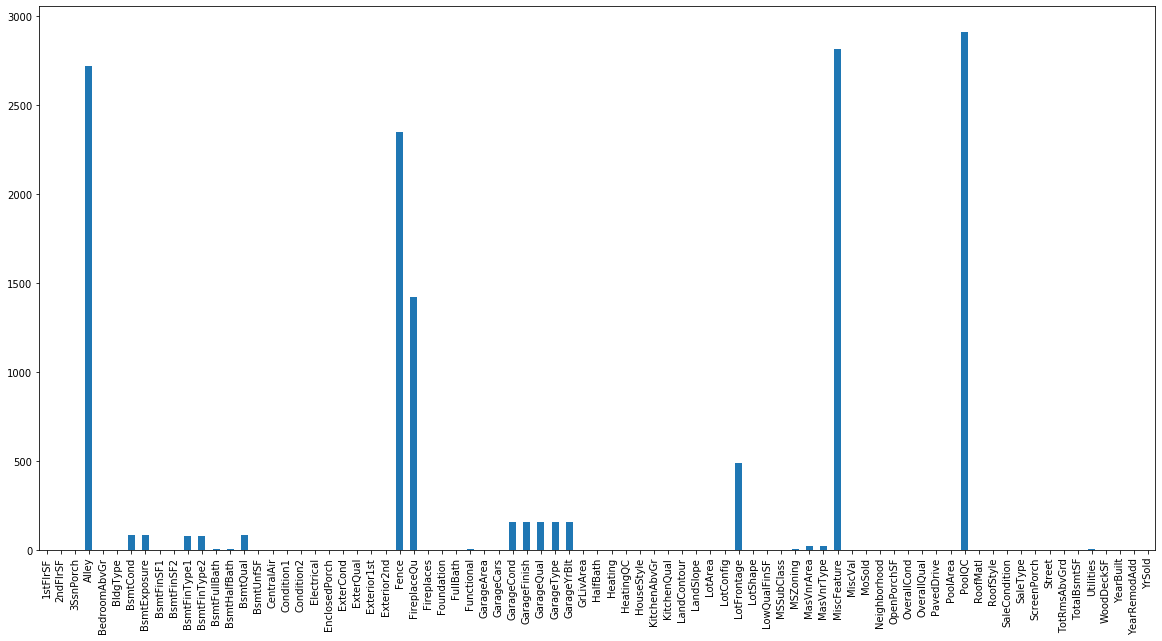

In [123]:
#create subplots
f,ax=plt.subplots(1,1,figsize=(20,10))
#create barplot for all missing values
k.plot(kind='bar')
plt.show()

### 1.14 check the Data Correlation using heatmap.And your observation?

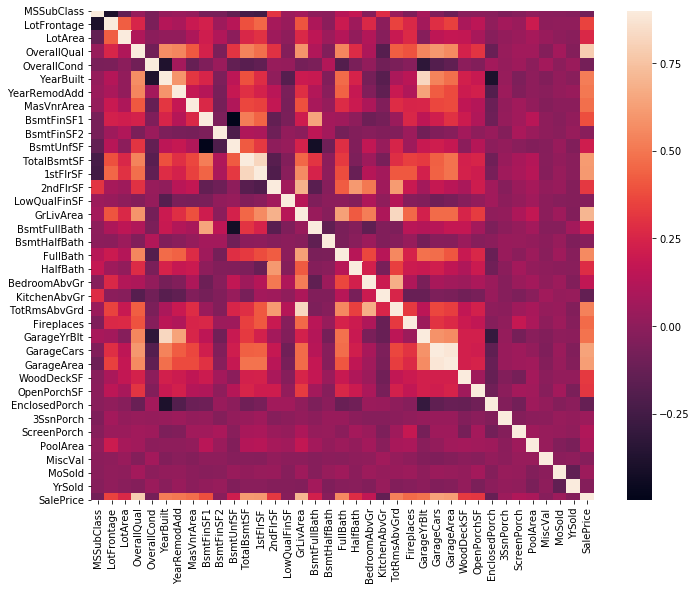

In [88]:
#Correlation map to see how features are correlated with SalePrice
plt.subplots(figsize=(12,9))
sns.heatmap(train.corr(),vmax=0.9,square=True)
plt.show()

#### observation:
   

In [ ]:
1)PoolQC is having highest number of missing values. in bargraph
2)Map shows independent variable correlating other variables.
3)Garageyrbuilt,yearbuilt are negatively correlated.


#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [124]:
all_data['PoolQC'].fillna("None",inplace=True)

#### MiscFeature : 
data description says NA means "no misc feature"

In [125]:
all_data['MiscFeature'].fillna("None",inplace=True)

#### Alley : 
data description says NA means "no alley access"

In [126]:
all_data['Alley'].fillna("None",inplace=True)

Fence : 
data description says NA means "no fence"

In [127]:
all_data['Fence'].fillna("None",inplace=True)

### 1.16 Check remaining missing values if any 

In [128]:
all_data_na=all_data.isnull().sum()
all_data_na

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
Utilities       2
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 79, dtype: int64

In [129]:
# FireplaceQu : data description says NA means "no fireplace"
all_data['FireplaceQu'].fillna("None",inplace=True)

In [130]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [131]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col]=all_data[col].fillna('None')

In [132]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea' ,'GarageCars'):
    all_data[col]=all_data[col].fillna(0)

In [133]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col]=all_data[col].fillna(0)

In [136]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' ,'BsmtFinType2'):
    all_data[col]=all_data[col].fillna('None')

In [137]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType']=all_data['MasVnrType'].fillna("None")

In [140]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])


In [141]:
#Functional : data description says NA means typical
all_data['Functional']=all_data['Functional'].fillna('typ')

In [142]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [143]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [144]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st']=all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [145]:
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [146]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass']=all_data['MSSubClass'].fillna("None")

### 1.17 Check again remaining missing values if any.And your observation?

In [158]:
all_data.isnull().sum()


1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
TotalBsmtSF     0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 78, dtype: int64

#### observation:
    

In [ ]:
Now we observe that we have successfully removed all the Null values from the dataset

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [189]:
#MSSubClass=The building class
train['MSSubClass_Cate']=train['MSSubClass'].astype('category')

#Changing OverallCond into a categorical variable
train['OverallCond_Cate']=train['OverallCond'].astype('category')

#Year and month sold are transformed into categorical features.
train['YrSold_Cate']=train['YrSold'].astype('category')
train['MoSold_Cate']=train['MoSold'].astype('category')


#### 1.18b) label Encoding some categorical variables that may contain information in their ordering set

In [162]:
cols=['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

# process columns, apply LabelEncoder to categorical features
for c in cols:
    le.fit_transform(train[c].values)
# shape        
print("shape=",train.shape)

In [33]:
train['MSZoning']=le.fit_transform(train['MSZoning'])
train['MSZoning'].value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: MSZoning, dtype: int64

In [46]:
test=pd.get_dummies(test)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler()

In [ ]:
pd.get_dummies(le.fit_transform())

In [47]:
sc.fit_transform(test)

array([[-0.87471081,  0.51054035,  0.36392912, ..., -0.13469875,
         0.46021084, -0.29936452],
       [-0.87471081,  0.55524755,  0.89786065, ..., -0.13469875,
         0.46021084, -0.29936452],
       [ 0.06135085,  0.2422971 ,  0.80964587, ..., -0.13469875,
         0.46021084, -0.29936452],
       ...,
       [-0.87471081,  4.08711696,  2.05514965, ..., -0.13469875,
        -2.17291708, -0.29936452],
       [ 0.64638939, -0.29418939,  0.12552719, ..., -0.13469875,
         0.46021084, -0.29936452],
       [ 0.06135085,  0.2422971 , -0.03879049, ..., -0.13469875,
         0.46021084, -0.29936452]])

In [49]:
test_scaled=pd.DataFrame(sc.fit_transform(test))

In [50]:
test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,-0.874711,0.510540,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.567170,0.063273,0.517171,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-0.874711,0.555248,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041060,1.063027,-0.297800,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.061351,0.242297,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.567170,0.772989,-0.297800,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.061351,0.421126,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.454535,0.357706,-0.297800,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,1.465443,-1.143626,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.567170,-0.387166,-0.297800,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


### 1.19 Introduction to Test and Train


In [3]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

In [ ]:
x=train.drop(['SalePrice'],axis=1)
y=train['SalePrice']

### 1.21 Split the data into train and test set(70/30)?

In [ ]:
X_train,Y_train,X_test,Y_test=train_test_split(x,y,train_size=0.7,random_state=0)

# The End